In [1]:
import warnings
warnings.filterwarnings("ignore")

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

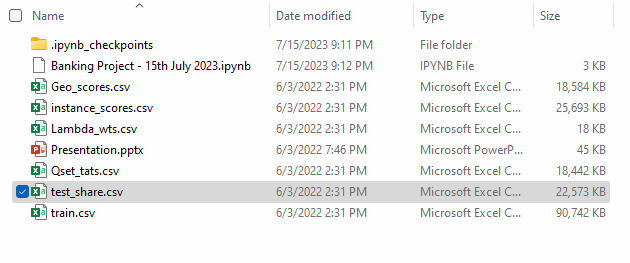

In [2]:
geo_scores = pd.read_csv("Geo_scores.csv")
instance = pd.read_csv("instance_scores.csv")
lambda_wts = pd.read_csv("Lambda_wts.csv")
qset_tats = pd.read_csv("Qset_tats.csv")
test = pd.read_csv("test_share.csv")
train = pd.read_csv("train.csv")

In [3]:
print(geo_scores.head())
print("****************"*10)
print(instance.head())
print("****************"*10)
print(lambda_wts.head())
print("****************"*10)
print(qset_tats.head())
print("****************"*10)
print(test.head())
print("****************"*10)
print(train.head())
print("****************"*10)

       id  geo_score
0   26674       4.48
1  204314       4.48
2  176521       5.17
3   48812      -2.41
4  126870       6.55
****************************************************************************************************************************************************************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
2  161170             0.44
3  191161             0.76
4   34521            -0.84
****************************************************************************************************************************************************************
     Group  lambda_wt
0   Grp936       3.41
1   Grp347      -2.88
2   Grp188       0.39
3  Grp1053      -2.75
4    Grp56      -0.83
****************************************************************************************************************************************************************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
2

In [4]:
print(geo_scores.shape)
print("****************"*10)
print(instance.shape)
print("****************"*10)
print(lambda_wts.shape)
print("****************"*10)
print(qset_tats.shape)
print("****************"*10)
print(test.shape)
print("****************"*10)
print(train.shape)
print("****************"*10)

(1424035, 2)
****************************************************************************************************************************************************************
(1424035, 2)
****************************************************************************************************************************************************************
(1400, 2)
****************************************************************************************************************************************************************
(1424035, 2)
****************************************************************************************************************************************************************
(56962, 27)
****************************************************************************************************************************************************************
(227845, 28)
*************************************************************************************************************************

In [5]:
print(geo_scores.isnull().sum())
print("****************"*10)
print(instance.isnull().sum())
print("****************"*10)
print(lambda_wts.isnull().sum())
print("****************"*10)
print(qset_tats.isnull().sum())
print("****************"*10)
print(test.isnull().sum())
print("****************"*10)
print(train.isnull().sum())
print("****************"*10)

id               0
geo_score    71543
dtype: int64
****************************************************************************************************************************************************************
id                 0
instance_scores    0
dtype: int64
****************************************************************************************************************************************************************
Group        0
lambda_wt    0
dtype: int64
****************************************************************************************************************************************************************
id                           0
qsets_normalized_tat    103201
dtype: int64
****************************************************************************************************************************************************************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5        

In [6]:
print(geo_scores.isnull().sum()/len(geo_scores)*100)
print("****************"*10)
print(qset_tats.isnull().sum()/len(qset_tats)*100)

id           0.000000
geo_score    5.023964
dtype: float64
****************************************************************************************************************************************************************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


In [7]:
print(geo_scores.info())
print("****************"*10)
print(qset_tats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
****************************************************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None


In [8]:
print(geo_scores.describe())
print("****************"*10)
print(qset_tats.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01
****************************************************************************************************************************************************************
                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


In [9]:
print(geo_scores.mean())
print("****************"*10)
print(qset_tats.mean())

id           142403.000000
geo_score        -0.000009
dtype: float64
****************************************************************************************************************************************************************
id                      142403.000000
qsets_normalized_tat         0.000011
dtype: float64


In [10]:
print(geo_scores.median())
print("****************"*10)
print(qset_tats.median())

id           142403.00
geo_score         0.18
dtype: float64
****************************************************************************************************************************************************************
id                      142403.00
qsets_normalized_tat         0.02
dtype: float64


In [11]:
geo_scores.fillna(0.18, inplace=True)
qset_tats.fillna(0.02, inplace=True)

In [12]:
print(geo_scores.isnull().sum()/len(geo_scores)*100)
print("****************"*10)
print(qset_tats.isnull().sum()/len(qset_tats)*100)

id           0.0
geo_score    0.0
dtype: float64
****************************************************************************************************************************************************************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64


In [13]:
print("geo_scores :", geo_scores['id'].nunique())
print("****************"*10)
print("instance :",instance['id'].nunique())
print("****************"*10)
print("lambda_wts :", lambda_wts["Group"].nunique())
print("****************"*10)
print("qset_tats :", qset_tats['id'].nunique())
print("****************"*10)
print("test id :",test['id'].nunique())
print("****************"*10)
print("test Group:",test['Group'].nunique())
print("****************"*10)
print("train id :", train['id'].nunique())
print("****************"*10)
print("train Group :", train['Group'].nunique())

geo_scores : 284807
****************************************************************************************************************************************************************
instance : 284807
****************************************************************************************************************************************************************
lambda_wts : 1400
****************************************************************************************************************************************************************
qset_tats : 284807
****************************************************************************************************************************************************************
test id : 56962
****************************************************************************************************************************************************************
test Group: 915
****************************************************************************************

In [14]:
56962+227845

284807

In [15]:
train['data'] = 'train'
test['data'] = 'test'

In [16]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train


In [17]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test


In [18]:
train.shape

(227845, 29)

In [19]:
test.shape

(56962, 28)

In [20]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [21]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data'],
      dtype='object')

In [22]:
# append both train and test data together

all_data = pd.concat([train, test], axis=0)

In [23]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [24]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [25]:
all_data.isnull().sum()

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
data                  0
dtype: int64

In [26]:
all_data['id'].nunique()

284807

In [27]:
print("geo_scores :", geo_scores['id'].nunique())
print("****************"*10)
print("instance :",instance['id'].nunique())
print("****************"*10)
print("lambda_wts :", lambda_wts["Group"].nunique())
print("****************"*10)
print("qset_tats :", qset_tats['id'].nunique())

geo_scores : 284807
****************************************************************************************************************************************************************
instance : 284807
****************************************************************************************************************************************************************
lambda_wts : 1400
****************************************************************************************************************************************************************
qset_tats : 284807


In [28]:
print("geo_scores :", geo_scores.shape)
print("****************"*10)
print("instance :",instance.shape)
print("****************"*10)
print("lambda_wts :", lambda_wts.shape)
print("****************"*10)
print("qset_tats :", qset_tats.shape)

geo_scores : (1424035, 2)
****************************************************************************************************************************************************************
instance : (1424035, 2)
****************************************************************************************************************************************************************
lambda_wts : (1400, 2)
****************************************************************************************************************************************************************
qset_tats : (1424035, 2)


In [29]:
print(geo_scores.describe())
print("****************"*10)
print(instance.describe())
print("****************"*10)
print(qset_tats.describe())

                 id     geo_score
count  1.424035e+06  1.424035e+06
mean   1.424030e+05  9.034321e-03
std    8.221673e+04  7.628149e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.170000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.170000e+00
max    2.848060e+05  4.581000e+01
****************************************************************************************************************************************************************
                 id  instance_scores
count  1.424035e+06     1.424035e+06
mean   1.424030e+05    -2.879143e-06
std    8.221673e+04     2.544506e+00
min    0.000000e+00    -1.231900e+02
25%    7.120100e+04    -6.400000e-01
50%    1.424030e+05    -4.000000e-02
75%    2.136050e+05     5.900000e-01
max    2.848060e+05     1.203500e+02
****************************************************************************************************************************************************************
                 id  qsets_normalized_t

In [30]:
print(geo_scores.max())
print("****************"*10)
print(instance.max())
print("****************"*10)
print(qset_tats.max())

id           284806.00
geo_score        45.81
dtype: float64
****************************************************************************************************************************************************************
id                 284806.00
instance_scores       120.35
dtype: float64
****************************************************************************************************************************************************************
id                      284806.0
qsets_normalized_tat        61.1
dtype: float64


In [31]:
geo_scores = geo_scores.groupby('id').mean()

In [32]:
instance = instance.groupby('id').mean()

In [33]:
qset_tats = qset_tats.groupby('id').mean()

In [34]:
print("geo_scores :", geo_scores.shape)
print("****************"*10)
print("instance :",instance.shape)
print("****************"*10)
print("lambda_wts :", lambda_wts.shape)
print("****************"*10)
print("qset_tats :", qset_tats.shape)

geo_scores : (284807, 1)
****************************************************************************************************************************************************************
instance : (284807, 1)
****************************************************************************************************************************************************************
lambda_wts : (1400, 2)
****************************************************************************************************************************************************************
qset_tats : (284807, 1)


In [35]:
geo_scores.head()

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540


In [36]:
# append geo_scores , instance and qset_tats with all_dataset

all_data = pd.merge(all_data, geo_scores , on='id', how='left')

In [37]:
all_data = pd.merge(all_data, instance , on='id', how='left')

In [38]:
all_data = pd.merge(all_data, qset_tats , on='id', how='left')

In [39]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat
284802,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test,-0.114,-0.51,0.010
284803,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test,0.110,-0.46,0.064
284804,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test,-0.530,0.65,-0.020
284805,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test,0.270,-0.92,0.610
284806,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test,-0.664,1.57,0.354


In [40]:
all_data['Group'].nunique()

1400

In [41]:
lambda_wts['Group'].nunique()

1400

In [42]:
all_data = pd.merge(all_data, lambda_wts , on='Group', how='left')

In [43]:
all_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.690000,0.750000,0.700000,-249.5050,NaN,test,-0.114,-0.51,0.010,-0.40
284803,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.883333,0.663333,0.660000,-248.7525,NaN,test,0.110,-0.46,0.064,-1.54
284804,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.880000,0.643333,0.676667,-231.0500,NaN,test,-0.530,0.65,-0.020,0.29
284805,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.616667,0.713333,0.706667,-246.3150,NaN,test,0.270,-0.92,0.610,-0.69


In [44]:
# Split train and test data seperately

train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [45]:
print(train.shape)
print()
print(test.shape)

(227845, 33)

(56962, 33)


In [46]:
test.isnull().sum()

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
data                        0
geo_score                   0
instance_scores             0
qsets_normalized_tat        0
lambda_wt                   0
dtype: int

In [47]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [48]:
test = test.drop(['id', 'Group','Target', 'data'], axis=1)

In [49]:
test.shape

(56962, 29)

In [50]:
test.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.406,0.39
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.374,1.80
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.130,1.89


In [51]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60


In [52]:
# split the data into independent and dependent variable 

x = train.drop(['id', 'Group','Target', 'data'], axis=1)
y = train[['Target']]

In [53]:
x.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.140,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,-0.302,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,0.60


In [54]:
y.head()

,Target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [55]:
y.value_counts()

Target
0.0       227451
1.0          394
dtype: int64

In [56]:
# handle imbalance dataset
import imblearn

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=101, sampling_strategy=0.75)
x_smote, y_smote = smote.fit_resample(x, y)


(454902, 29) (454902, 1)

Target
0.0       227451
1.0          394
dtype: int64

Target
0.0       227451
1.0       227451
dtype: int64


In [63]:
print(x_smote.shape, y_smote.shape)
print()
print(y.value_counts())
print()
print(y_smote.value_counts())

(454902, 29) (454902, 1)

Target
0.0       227451
1.0          394
dtype: int64

Target
0.0       227451
1.0       227451
dtype: int64


In [ ]:
"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, 
                                                    random_state=101, stratify=y)
                                                    """

In [66]:
# split the data into train and test for building the model and prediction

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, train_size=0.7, 
                                                    random_state=101, stratify=y_smote)

# Building model

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [72]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()
clf4 = GradientBoostingClassifier()
clf5 = SVC(kernel='rbf')

In [73]:
estimators = [('logit', clf1),('knn', clf2),('rf', clf3),('gb', clf4),('svm', clf5)]

In [ ]:
for i in estimators:
    x = cross_val_score(i[1], x_smote, y_smote, cv=10, scoring='accuracy')
    print(i[0], np.round(np.mean(x),2))

logit 0.95


In [ ]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

In [ ]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
confusion_matrix(y_train, y_pred_train)
confusion_matrix(y_test, y_pred_test)

In [ ]:
classification_report(y_train, y_pred_train)
classification_report(y_test, y_pred_test)

In [ ]:
accuracy_score(y_train, y_pred_train)
accuracy_score(y_test, y_pred_test)

In [ ]:
# AUC-ROC
# CUT-OFF VALUE

In [ ]:
# CROSS VALIDATION

In [ ]:
# ISOLATION FOREST
# LOCAL OUTLIER FACTOR
# ONE SUPPORT VECTOR MACHINE
# DEEP NEURAL NETWORK